In [51]:
import pandas as pd
import requests
key ="22babdfc59b22de5bfb31d8b4b31ea43"

# 地理编码

In [52]:
# 地理编码
def geocode(address,city=None,batch=None,sig=None)->dict:   
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
角社广场 = geocode(address='广东省东莞市东坑镇角社广场')
print(角社广场)
df_角社广场地理编码 = pd.json_normalize(角社广场['geocodes'])
display(df_角社广场地理编码)
角社广场地理编码 = 角社广场['geocodes'][0]['location']
print("角社广场地理编码:",角社广场地理编码)
# 这里很轻松就可以得到地理编码

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省东莞市角社广场', 'country': '中国', 'province': '广东省', 'citycode': '0769', 'city': '东莞市', 'district': [], 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '441900', 'street': [], 'number': [], 'location': '113.927619,23.013560', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省东莞市角社广场,中国,广东省,0769,东莞市,[],[],441900,[],[],"113.927619,23.013560",兴趣点,[],[],[],[]


角社广场地理编码: 113.927619,23.013560


# 逆地理编码

In [53]:
# 逆地理编码同理
import requests
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
角社广场逆地理编码 = regeocode('113.927619,23.013560')
print(角社广场逆地理编码)
df_角社广场逆地理编码 = pd.json_normalize(角社广场逆地理编码).T
display(df_角社广场逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '东莞市', 'province': '广东省', 'adcode': '441900', 'district': [], 'towncode': '441900109000', 'streetNumber': {'number': '60号', 'location': '113.927673,23.0135953', 'direction': '东北', 'distance': '6.7915', 'street': '角祥路'}, 'country': '中国', 'township': '东坑镇', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0769'}, 'formatted_address': '广东省东莞市东坑镇角祥路60号角社广场'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,东莞市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,441900
regeocode.addressComponent.district,[]
regeocode.addressComponent.towncode,441900109000
regeocode.addressComponent.streetNumber.number,60号
regeocode.addressComponent.streetNumber.location,"113.927673,23.0135953"


In [54]:
角社广场逆地理编码_all = regeocode(角社广场地理编码,extensions="all")
print(角社广场逆地理编码_all)
df_角社广场逆地理编码_all = pd.json_normalize(角社广场逆地理编码_all)
display(df_角社广场逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0769F49F0120484472', 'location': '113.928,23.0129', 'direction': '北', 'name': '角祥路', 'distance': '73.2174'}, {'id': '0769F49F01204810308', 'location': '113.93,23.0142', 'direction': '西', 'name': '福兴路', 'distance': '223.837'}, {'id': '0769F49F0120484425', 'location': '113.925,23.0119', 'direction': '东北', 'name': '东兴西路', 'distance': '342.398'}], 'roadinters': [{'second_name': '角祥路', 'first_id': '0769F49F01204810308', 'second_id': '0769F49F0120484472', 'location': '113.9296814,23.01422944', 'distance': '223.837', 'first_name': '福兴路', 'direction': '西'}], 'formatted_address': '广东省东莞市东坑镇角祥路60号角社广场', 'addressComponent': {'city': '东莞市', 'province': '广东省', 'adcode': '441900', 'district': [], 'towncode': '441900109000', 'streetNumber': {'number': '60号', 'location': '113.927673,23.0135953', 'direction': '东北', 'distance': '6.7915', 'street': '角祥路'}, 'country': '中国', 'township': '东坑镇', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neig

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '0769F49F0120484472', 'location': '113...","[{'second_name': '角祥路', 'first_id': '0769F49F0...",广东省东莞市东坑镇角祥路60号角社广场,东莞市,广东省,441900,[],...,中国,东坑镇,[[]],[],[],[],[],0769,"[{'area': '10356.501201', 'type': '110105', 'i...","[{'id': 'B0FFGQ3KI1', 'direction': '北', 'busin..."


In [55]:
roads = pd.json_normalize(角社广场逆地理编码_all['regeocode']['roads'])
roadinters = pd.json_normalize(角社广场逆地理编码_all['regeocode']['roadinters'])
aois = pd.json_normalize(角社广场逆地理编码_all['regeocode']['aois'])
pois = pd.json_normalize(角社广场逆地理编码_all['regeocode']['pois'])

display(roads,roadinters,aois,pois,)


,id,location,direction,name,distance
0,0769F49F0120484472,"113.928,23.0129",北,角祥路,73.2174
1,0769F49F01204810308,"113.93,23.0142",西,福兴路,223.837
2,0769F49F0120484425,"113.925,23.0119",东北,东兴西路,342.398


,second_name,first_id,second_id,location,distance,first_name,direction
0,角祥路,0769F49F01204810308,0769F49F0120484472,"113.9296814,23.01422944",223.837,福兴路,西


,area,type,id,location,adcode,name,distance
0,10356.501201,110105,B0FFGQ3KI1,"113.927695,23.013824",441900,角社广场,0


,id,direction,businessarea,address,poiweight,name,location,distance,tel,type
0,B0FFGQ3KI1,北,[],角祥路62号,0.334017,角社广场,"113.927695,23.013824",30.3608,[],风景名胜;公园广场;城市广场
1,B0FFM15XBY,西南,[],[],0.130041,角社村文化活动中心,"113.927071,23.012663",114.418,[],政府机构及社会团体;政府机关;乡镇以下级政府及事业单位
2,B030103JTR,南,[],角祥路14号附近,0.186022,嘉伦光彩大药房(角祥路),"113.926838,23.011043",291.071,[],医疗保健服务;医药保健销售店;药房
3,B0FFI8S17X,西北,[],角社广场西北(东兴西路东),0.207328,东坑镇角社村农民公寓1期,"113.926327,23.014670",180.887,[],商务住宅;住宅区;住宅区
4,B0FFFZO7BW,西,[],东兴西路东150米,0.192226,领胜集团,"113.925809,23.013106",192.006,[],公司企业;公司;公司
5,B0301033ZH,东,[],角祥路91号附近,0.177935,冠恩玩具厂,"113.930207,23.014246",275.655,[],公司企业;工厂;工厂
6,B0FFGKULBI,东,[],东坑镇角社村角祥路68号,0.17996,长冠绣花厂,"113.928721,23.013326",115.772,[],公司企业;工厂;工厂
7,B03018N5W8,东南,[],东坑镇角社村,0.333403,苏氏宗祠,"113.929786,23.010991",361.669,[],风景名胜;风景名胜;寺庙道观
8,B0FFGHIU8T,西北,[],[],0.183594,角社农民公寓,"113.92488,23.016098",397.788,[],商务住宅;住宅区;住宅小区
9,B0FFF98DCV,东北,[],东莞市,0.120668,角社禾塘新围126号楼,"113.929002,23.014627",184.7,[],地名地址信息;门牌信息;楼栋号


* aois：aoi信息列表请求参数
* pois：poi信息列表请求参数
* roadinters：道路交叉口列表 
* export：交叉路口到请求坐标的距离 
* 单位：米 
* 方位：输入点相对路口的方位 路口经纬度 第一条道路id：第一条道路名称 第二条道路id：第二条道路名称
* roads：道路信息列表 
* export: 道路id：道路名称 方位：坐标点

# 路径规划之步行导航

In [56]:
# 步行导航
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [57]:
东坑中学 = geocode('广东省东莞市东坑中学')
东坑中学_location = 东坑中学['geocodes'][0]['location']
角社广场_location = 角社广场['geocodes'][0]['location']
print("(start)角社广场_location:",角社广场_location,"(end)东坑中学_location:",东坑中学_location)

(start)角社广场_location: 113.927619,23.013560 (end)东坑中学_location: 113.930499,22.984122


In [11]:
角社广场_东坑中学 = walking(角社广场_location,东坑中学_location)
df_步行 = pd.json_normalize(角社广场_东坑中学["route"]["paths"][0]['steps'])
display(df_步行)
df_步行["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向东南步行66米右转,东南,[],66,53,"113.927391,23.013429;113.927734,23.012925",右转,[],0
1,沿角祥路向西南步行372米左转,西南,角祥路,372,298,"113.927734,23.012921;113.927522,23.012778;113....",左转,[],0
2,沿东兴西路向东南步行567米直行,东南,东兴西路,567,454,"113.925968,23.009978;113.926124,23.009714;113....",直行,[],0
3,沿东兴中路向东南步行368米向右前方行走,东南,东兴中路,368,294,"113.928533,23.00543;113.928663,23.005174;113.9...",向右前方行走,[],0
4,沿骏发路向南步行812米右转,南,骏发路,812,650,"113.930816,23.002843;113.930816,23.002756;113....",右转,[],0
5,向南步行380米向右前方行走,南,[],380,304,"113.931189,22.995838;113.931072,22.995729;113....",向右前方行走,[],0
6,向西南步行42米左转,西南,[],42,34,"113.929874,22.992652;113.929566,22.992409",左转,[],0
7,沿骏发西路向东南步行351米向左前方行走,东南,骏发西路,351,281,"113.929562,22.992405;113.929891,22.99181;113.9...",向左前方行走,[],0
8,步行14米右转,[],[],14,11,"113.931515,22.9899;113.931654,22.989891",右转,[],1
9,沿东坑大道中步行13米向左前方行走,[],东坑大道中,13,10,"113.931654,22.989887;113.931662,22.989826;113....",向左前方行走,[],0


0               向东南步行66米右转
1          沿角祥路向西南步行372米左转
2         沿东兴西路向东南步行567米直行
3     沿东兴中路向东南步行368米向右前方行走
4           沿骏发路向南步行812米右转
5           向南步行380米向右前方行走
6               向西南步行42米左转
7     沿骏发西路向东南步行351米向左前方行走
8                  步行14米右转
9        沿东坑大道中步行13米向左前方行走
10        沿骏达中路向东南步行216米右转
11         向西南步行524米向右前方行走
12           沿科技路向西北步行5米左转
13                 步行35米左转
14          沿科技路向东南步行34米右转
15           向西南步行13米到达目的地
Name: instruction, dtype: object

# 路径规划2之公交车路线规划

In [45]:
# 公车导航
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [58]:
东坑中学 = geocode('广东省东莞市东坑中学')
东坑中学_location = 东坑中学['geocodes'][0]['location']
角社广场_location = 角社广场['geocodes'][0]['location']
print("(start)角社广场_location:",角社广场_location,"(end)东坑中学_location:",东坑中学_location)

(start)角社广场_location: 113.927619,23.013560 (end)东坑中学_location: 113.930499,22.984122


In [14]:
角社广场_东坑中学 = integrated(角社广场_location,东坑中学_location,city='东莞',extensions='all')
df_bus = pd.json_normalize(角社广场_东坑中学)
df_bus

,status,info,infocode,count,route.origin,route.destination,route.distance,route.taxi_cost,route.transits
0,1,OK,10000,5,"113.927619,23.013560","113.930499,22.984122",3249,11.59712,"[{'cost': [], 'duration': '2679', 'nightflag':..."


In [15]:
pd.json_normalize(角社广场_东坑中学["route"]['transits'])

,cost,duration,nightflag,walking_distance,distance,missed,segments
0,[],2679,0,1825,4081,1,"[{'taxi': [], 'walking': {'origin': '113.92739..."
1,3.0,2721,0,1813,5211,1,"[{'taxi': [], 'walking': {'origin': '113.92739..."
2,2.0,3258,0,2680,4072,1,"[{'taxi': [], 'walking': {'origin': '113.92739..."
3,2.0,3974,0,2497,7994,1,"[{'taxi': [], 'walking': {'origin': '113.92739..."
4,4.0,3528,0,1748,4313,1,"[{'taxi': [], 'walking': {'origin': '113.92739..."


In [16]:
pd.json_normalize(角社广场_东坑中学["route"]['transits'][0]['segments'])

,taxi,entrance,exit,walking.origin,walking.destination,walking.distance,walking.duration,walking.steps,bus.buslines,railway.via_stops,railway.alters,railway.spaces
0,[],[],[],"113.927391,23.013430","113.928696,23.004995",1065,912,"[{'instruction': '步行66米右转', 'road': [], 'dista...","[{'departure_stop': {'name': '银都市场', 'id': '90...",[],[],[]
1,[],[],[],"113.932114,22.989418","113.930458,22.984245",760,651,"[{'instruction': '沿骏达中路步行157米右转', 'road': '骏达中...",[],[],[],[]


In [59]:
df_bus_乘车信息 = pd.json_normalize(角社广场_东坑中学["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_乘车信息

,name,id,type,distance,duration,polyline,bustimetag,start_time,end_time,via_num,via_stops,departure_stop.name,departure_stop.id,departure_stop.location,arrival_stop.name,arrival_stop.id,arrival_stop.location
0,370路(松湖智谷(泰和路)--东坑车站),900000127373,普通公交线路,2256,1115,"113.928696,23.004992;113.928780,23.004873;113....",2,[],[],3,"[{'name': '三甲产业园', 'id': '900000127373026', 'l...",银都市场,900000127373025,"113.928696,23.004992",东坑车站,900000127373029,"113.932114,22.989414"


In [18]:
_3路公交车 = pd.json_normalize(角社广场_东坑中学["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"3路公交车"})
display(_3路公交车)

,3路公交车,id,location
0,三甲产业园,900000127373026,"113.931023,23.001289"
1,鹰岭公园站,900000127373027,"113.930344,22.997890"
2,先益电子厂,900000127373028,"113.928391,22.994699"


* 可以看到公交车站点也不同，数据库较大，但依然可以将其我们需要的全部调用出来，还包括着每个站点的地理编码。

# 行政区域

In [19]:
# 行政区域级别划分
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [20]:
行政区域 = district(keywords='广东',extensions='all',subdistrict=2)
df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])
display(df_行政区域_1级,)

,citycode,adcode,name,center,level,districts
0,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440402', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440883', 'nam..."
7,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
8,0660,441500,汕尾市,"115.364238,22.774485",city,"[{'citycode': '0660', 'adcode': '441523', 'nam..."
9,0768,445100,潮州市,"116.632301,23.661701",city,"[{'citycode': '0768', 'adcode': '445122', 'nam..."


In [21]:
df_行政区域_2级_东莞市 = pd.json_normalize(行政区域["districts"][0]['districts'][16]['districts'])
display(df_行政区域_2级_东莞市)

,citycode,adcode,name,center,level,districts
0,0769,441900,莞城街道,"113.743,23.0225",street,[]
1,0769,441900,常平镇,"114.036,23.0074",street,[]
2,0769,441900,望牛墩镇,"113.676,23.0683",street,[]
3,0769,441900,大朗镇,"113.939,22.8654",street,[]
4,0769,441900,麻涌镇,"113.562,22.9718",street,[]
5,0769,441900,黄江镇,"113.973,22.8121",street,[]
6,0769,441900,凤岗镇,"114.105,22.7308",street,[]
7,0769,441900,东莞生态园,"113.917,23.0806",street,[]
8,0769,441900,桥头镇,"114.065,23.0315",street,[]
9,0769,441900,樟木头镇,"114.018,22.8704",street,[]


# 搜索poi

In [22]:
# 搜索POI（关键字）
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [23]:
餐厅 = place_text('火锅店','火锅',city="东莞市",children=1,extensions='all')
餐厅

{'status': '1',
 'count': '894',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFF9G00P',
   'parent': [],
   'childtype': [],
   'name': '火汤港式牛肉火锅',
   'tag': '冬阴功汤底,牛拼盘,虾滑,脆爆珊瑚球,鲜虾蟹子云吞,本地牛肉,鬼马油条,鲜虾芝士丸,火汤,腐皮卷,小妍子酸奶,生鱼,冬瓜鸡脚汤底,响铃卷,瑶柱鸡脚,香滑豆腐,海鲜拼盘,牛舌,紫菜脆腐皮,脆肉皖,小研子抹茶布丁,秘制沙爹锅底,蟹子墨鱼面,黑松露饺子,猪颈肉',
   'type': '餐饮服务;中餐厅;火锅店',
   'typecode': '050117',
   'biz_type': 'diner',
   'address': '东堤路教育路A座8-9号(建设银行旁)',
   'location': '113.738341,23.049667',
   'tel': '15382888874',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '0769',
   'cityname': '东莞市',
   'adcode': '441900',
   'adname': '东莞市',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3413455920',
   'distance': [],
   'navi_poiid': 'F49F012046_76152',
   'entr_location': [],
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '20

In [26]:
df_餐厅 = pd.json_normalize(餐厅["pois"])
df_餐厅_火锅 = pd.json_normalize(餐厅["pois"][7]["children"])
display(df_餐厅,df_餐厅_火锅)


,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFF9G00P,[],[],火汤港式牛肉火锅,"冬阴功汤底,牛拼盘,虾滑,脆爆珊瑚球,鲜虾蟹子云吞,本地牛肉,鬼马油条,鲜虾芝士丸,火汤,腐...",餐饮服务;中餐厅;火锅店,050117,diner,东堤路教育路A座8-9号(建设银行旁),"113.738341,23.049667",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],5.0,124.00,0
1,B0FFHEITFK,[],[],蜀八婆香汁焖锅(莞城店),"黄焖鸭,黄焖牛杂,黄焖三黄鸡,鸡煲虾,香汁牛杂,酸梅汤,虫草花猪肚鸡,脆皮饺,猴头菇猪肚鸡,...",餐饮服务;中餐厅;火锅店,050117,diner,莞城街道北正路60号二楼,"113.753280,23.044230",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,34.00,0
2,B0FFI09K7Z,[],[],会友轩(西城楼店),"猪肚鸡,酱油炒饭,地锅饼,千张结,地锅鸡,酱料,水仙牛肉,雪花猪肉,岭南牛杂炒饭,扬州炒饭,...",餐饮服务;中餐厅;火锅店,050117,diner,[],"113.752381,23.039753",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,67.00,0
3,B0FFGAQ3Q3,[],[],海底捞火锅(盈峰广场店),"澳洲极品牛肉,虾滑,捞派毛肚,捞派鸭肠,脑花,牛百叶,捞派捞面,腐竹,甜玉米,藕片,油豆皮,...",餐饮服务;中餐厅;火锅店,050117,diner,东纵大道138号盈锋商务中心3层C1号,"113.775501,23.037425",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,117.00,0
4,B030100N5U,[],[],上宝涮涮锅(花园店),"泡菜火锅套餐,昆布清汤底,菇菌养生汤底,雪花肥牛,海南椰子鸡肉锅套餐,卤肉饭,炸腐竹,雪糕,...",餐饮服务;中餐厅;火锅店,050117,diner,花园新村花园路180号,"113.762380,23.053606",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,45.00,0
5,B030100A04,[],[],珍珍火锅,"毛血旺,猪脑,豌豆尖,酥肉片,鸡子,鸳鸯锅,锅巴,凉拌青瓜,干煸四季豆,水煮鱼,肥羊,大白菜...",餐饮服务;中餐厅;火锅店,050117,diner,东城街道花园大道44号,"113.760336,23.049985",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,69.00,0
6,B0FFLFKX2Z,[],[],海底捞火锅(华南摩尔店),"捞派虾滑,捞派滑牛肉,捞派豆花,现炸酥肉,捞派鸭肠",餐饮服务;中餐厅;火锅店,050117,diner,万江街道万道路万江段24号华南摩尔主题购物公园12栋2021室(食悦围城2层),"113.728283,23.034418",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],5.0,100.00,0
7,B03018QMQ9,B03017UD6I,202,冠菌自助火锅(莞城店),"肥牛,龙虾,水果,丸子,鱿鱼丝,青瓜,生菜,牛肉丸,鲜蟹,鱿鱼螃蟹虾,火龙果,炒饭,土豆,西...",餐饮服务;中餐厅;火锅店,050117,diner,东城西路103号合利大厦2层,"113.767384,23.033820",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,63.00,0
8,B0FFLGT5VA,[],[],龙虾私厨,"秘制牛杂锅,炸腐竹,秘制牛杂煲,娃娃菜,双层肥牛,进口优质肥牛,招牌柠檬茶,波士顿龙虾煲,炒...",餐饮服务;中餐厅;火锅店,050117,diner,万江区万江墟新联街5号,"113.736710,23.044841",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.0,53.00,0
9,B0FFKXAZWV,B03018OI07,201,凑凑火锅·茶憩(东城万达店),"大红袍珍珠奶茶,鸭血,海鲜棒棒糖,毛肚,冰沙,台式麻辣锅,飞鱼籽墨鱼滑,风味鸭肠,雪花牛肉粒...",餐饮服务;中餐厅;火锅店,050117,diner,东纵路东城段208号东城万达广场L3层,"113.779694,23.035530",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",B03018OI07,3,3F,GD0009320210300246,4.5,125.00,0


""


In [24]:
# 周边搜索
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [25]:
角社广场 = place_around(角社广场_location)
df_角社广场 = pd.json_normalize(角社广场['pois'])
df_角社广场


,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B0FFM15LA1,[],[],角社村居家养老服务站,生活服务;生活服务场所;生活服务场所,070000,[],[],"113.926968,23.012589",[],127,[],[],[],0,[],[]
1,B0FFH3ZX2G,[],[],鸿泰楼,商务住宅;住宅区;住宅区,120300,[],东坑镇角社广场对面,"113.927483,23.012329",[],137,[],[],[],0,[],[]
2,B0FFGXVS1Z,[],[],清清饮水店,生活服务;生活服务场所;生活服务场所,070000,[],东坑镇东坑镇角社村角祥路34号(角社广场旁),"113.927223,23.012017",[],176,[],[],[],0,[],[]
3,B0FFI8S17X,[],[],东坑镇角社村农民公寓1期,商务住宅;住宅区;住宅区,120300,[],角社广场西北(东兴西路东),"113.926327,23.014670",[],181,[],[],[],0,[],[]
4,B0FFJQOG0F,[],[],社民公馆,商务住宅;商务住宅相关;商务住宅相关,120000,[],角祥路80附近,"113.929402,23.013906",[],186,[],[],[],0,[],[]
5,B0FFKMR4WY,[],[],鹏达卷闸门,生活服务;生活服务场所;生活服务场所,070000,[],角祥路24附近,"113.927168,23.011921",[],188,[],[],[],0,[],[]
6,B0FFIXA3Q1,[],[],东莞市东坑熠若货运服务部,生活服务;生活服务场所;生活服务场所,070000,[],角祥路24号附近,"113.927160,23.011469",18938529397,237,[],[],[],0,[],[]
7,B0FFGA71TB,[],[],香丽圆面包店,餐饮服务;糕饼店;糕饼店,050800,diner,东坑镇角社村角祥路17号,"113.926628,23.011622",[],238,[],[],[],0,[],[]
8,B0FFM59X3Y,[],[],新香灵鲜包(角社店),餐饮服务;中餐厅;中餐厅,050100,diner,[],"113.926644,23.011460",[],254,[],[],[],0,[],[]
9,B0FFHGNJEZ,[],[],沙县小吃(角祥路店),餐饮服务;中餐厅;特色/地方风味餐厅,050118,diner,东坑镇角社村角祥路22号,"113.926856,23.011348",[],258,[],[],[],0,[],[]


# 多边形搜索

In [26]:
def more_around(polygon,keywords=None,types=None,offset=None,page=None,extensions='all',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/polygon?parameters'
    params={
        'key':key,
        'polygon':polygon,
        'keywords':keywords,
        'types':types,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [27]:
kfc = more_around('116.460988,40.006919|116.48231,40.007381;116.47516,39.99713|116.472596,39.985227|116.45669,39.984989|116.460988,40.006919','肯德基','050301',"20",extensions='all')
kfc
# 使用的是高德web参考文档中的默认坐标

{'status': '1',
 'count': '3',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B000A7BM4H',
   'parent': 'B0FFF5UV26',
   'childtype': '202',
   'name': '肯德基(花家地店)',
   'tag': '原味吮指鸡,炸薯条,藜麦蛋挞拿铁沙啦餐T,吮指原味鸡T,香辣鸡腿堡S豆泥餐T,全家桶套餐,金沙咸蛋黄香辣鸡翅,葡式蛋挞T,香草风味冰拿铁,奥堡辣翅荟蔬汤餐,十三鲜小龙虾烤鸡堡T,香辣鸡腿堡STN,葡式蛋挞经典装,藤椒肯大大鸡排,老北京鸡肉卷,新奥尔良烤翅,北海道冰淇淋,超级塔可,牛油果鸡肉超级塔可T,醇香土豆泥T,培根饭团热浆春卷餐,猪柳蛋帕尼S拿铁薯,馋嘴巴香辣鸡翅尖,塔可青年单人餐,塔可双人经典餐',
   'type': '餐饮服务;快餐厅;肯德基',
   'typecode': '050301',
   'biz_type': 'diner',
   'address': '花家地小区1号商业楼',
   'location': '116.469251,39.985551',
   'tel': '010-84726925;010-84726915',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '110000',
   'pname': '北京市',
   'citycode': '010',
   'cityname': '北京市',
   'adcode': '110105',
   'adname': '朝阳区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '5916738701',
   'distance': [],
   'navi_poiid': 'J50F001020_425283',
   'entr_location': '116.469414,39.98

# 静态地图

In [28]:
# 静态地图
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

In [29]:
角社广场 = geocode('广东省东莞市东坑镇角社广场')
角社广场_location = 角社广场['geocodes'][0]['location']

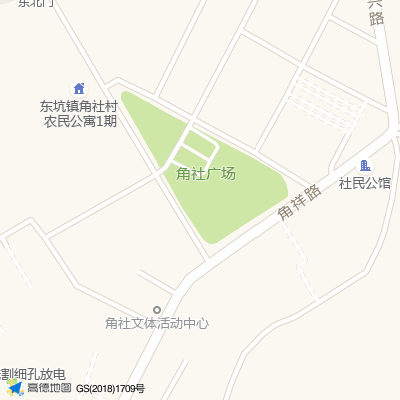

In [30]:
staticmap(location=角社广场_location,zoom=16)

# IP定位

In [31]:
def ip(ip:str):
    parameters = {
        'key':key,
        'ip':ip,
        'output':'json'
    }
    r = requests.get ("https://restapi.amap.com/v3/ip?parameters",params=parameters)
    data = r.json()
    del data ['status']
    del data ['info']
    df = ["省份:%s"%(data['province']),"地区:%s"%(data['city']),"地理编码:%s"%(data['adcode']),"经纬度:%s"%(data['rectangle'])]
    print("ip:"+ip)
    for i in df:
        print(i)
    return

In [32]:
ip("210.21.79.245")

ip:210.21.79.245
省份:广东省
地区:广州市
地理编码:440100
经纬度:113.1017375,22.93212254;113.6770499,23.3809537


* ip定位，将自身的地理编码输入，输出你的城市，地理编码，可。

# 坐标转换

In [33]:
def adress(locations,coordsys=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key': key,
        'locations':locations,
        'coordsys':coordsys,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [34]:
角社广场 = adress('113.927619,23.013560','gps')
角社广场

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '113.932519802518,23.010672200521'}

# 交通态势

In [35]:
def transport(rectangle=None,callback=None,level=None,sig=None,extensions="base",)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key': key,
        'rectangle':rectangle,
        'level':level,
        'extensions':extensions,
        'sig':sig,
        'callback':callback,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [36]:
transport('113.927619,23.013560;113.930499,22.984122',extensions="base")

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '骏发三路：双向畅通。',
  'evaluation': {'expedite': '50.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '50.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

* 交通态势对当今车辆繁多的城市来说真的非常重要，对于我们出行有极大的帮助。

# 批量请求借口

In [62]:
parameters = {'key':key,
             'city' :"广州",
             'citylimit':True,
              'address':"广州大学"
              }
r = requests.get("https://restapi.amap.com/v3/geocode/geo?parameters", params=parameters)
r.url

'https://restapi.amap.com/v3/geocode/geo?parameters&key=22babdfc59b22de5bfb31d8b4b31ea43&city=%E5%B9%BF%E5%B7%9E&citylimit=True&address=%E5%B9%BF%E5%B7%9E%E5%A4%A7%E5%AD%A6'

In [63]:
def batch()->dict:
    url = "https://restapi.amap.com/v3/batch?key=c48d7391025d651c4a078f7fa0b299d9"
    headers = {
        'Content-Type':'application/json',
    }
    data = {
        "ops":[
            {
                "url": "/v3/geocode/geo?parameters&key=22babdfc59b22de5bfb31d8b4b31ea43&city=%E5%B9%BF%E5%B7%9E&citylimit=True&address=%E4%B8%AD%E5%B1%B1%E5%A4%A7%E5%AD%A6"
            },
            
                {
                "url": "/v3/geocode/geo?parameters&key=22babdfc59b22de5bfb31d8b4b31ea43&city=%E5%B9%BF%E5%B7%9E&citylimit=True&address=%E5%B9%BF%E5%B7%9E%E5%A4%A7%E5%AD%A6"
            }
        ]
    }
    params ={
        "key":key,}
    response = request.post(url,headers=headers,params=params,json=data)
    result = response.json()
    return results

In [64]:
parameters = {
    "key":key,
}
body ={
        "ops":[
            {
                "url": "/v3/geocode/geo?parameters&key=22babdfc59b22de5bfb31d8b4b31ea43&city=%E5%B9%BF%E5%B7%9E&citylimit=True&address=%E4%B8%AD%E5%B1%B1%E5%A4%A7%E5%AD%A6"
            },
            
                {
                "url": "/v3/geocode/geo?parameters&key=22babdfc59b22de5bfb31d8b4b31ea43&city=%E5%B9%BF%E5%B7%9E&citylimit=True&address=%E5%B9%BF%E5%B7%9E%E5%A4%A7%E5%AD%A6"
            }
            
        ]
        
    }
r=requests.get("https://restapi.amap.com/v3/batch?",params=parameters,json=body)
data = r.json()
data


[{'status': 200,
  'body': {'info': 'OK',
   'status': '1',
   'count': '1',
   'geocodes': [{'level': '兴趣点',
     'city': '广州市',
     'province': '广东省',
     'neighborhood': {'name': {}, 'type': {}},
     'district': '海珠区',
     'street': {},
     'number': {},
     'country': '中国',
     'township': {},
     'formatted_address': '广东省广州市海珠区中山大学',
     'location': '113.291103,23.092973',
     'adcode': '440105',
     'building': {'name': {}, 'type': {}},
     'citycode': '020'}],
   'infocode': '10000'},
  'header': {'gsid': '010150200029158756250607700018298130410',
   'Content-Type': 'application/json;charset=UTF-8',
   'Access-Control-Allow-Methods': '*',
   'Access-Control-Allow-Origin': '*',
   'sc': '0.013',
   'Content-Length': 415,
   'Access-Control-Allow-Headers': 'DNT,X-CustomHeader,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type,key,x-biz,x-info,platinfo,encr,enginever,gzipped,poiid',
   'X-Powered-By': 'ring/1.0.0'}},
 {'status': 200,
  '

# 天气查询

In [49]:
def weather(city,extensions=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [50]:
weather(city='441900',extensions="base")

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '东莞市',
   'adcode': '441900',
   'weather': '雨',
   'temperature': '17',
   'winddirection': '东',
   'windpower': '≤3',
   'humidity': '96',
   'reporttime': '2020-04-22 20:52:45'}]}

# 输入提示

In [51]:
def input_q(keywords,types,location=None,city=None,citylimit=None,datatype=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params = {
        'key':key,
        'keywords':keywords,
        'types':types,
        'location':location,
        'city':city,
        'citylimit':False,
        'datatype':datatype,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [52]:
火锅店 = input_q('火锅','050301','116.716534,23.371476',city='东莞',datatype='all')
火锅店

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '火锅',
   'district': [],
   'adcode': [],
   'location': [],
   'address': [],
   'typecode': [],
   'city': []},
  {'id': 'B0FFFA8MFG',
   'name': '海底捞火锅(汇一城店)',
   'district': '广东省东莞市',
   'adcode': '441900',
   'location': '113.754958,23.006841',
   'address': '鸿福路200号汇一城购物中心L2层',
   'typecode': '050117',
   'city': []},
  {'id': 'B0FFGAQ3Q3',
   'name': '海底捞火锅(盈峰广场店)',
   'district': '广东省东莞市',
   'adcode': '441900',
   'location': '113.775501,23.037425',
   'address': '东纵大道138号盈锋商务中心3层C1号',
   'typecode': '050117',
   'city': []},
  {'id': 'B03018K5FT',
   'name': '桃太郎烧肉火锅(常平店)',
   'district': '广东省东莞市',
   'adcode': '441900',
   'location': '114.001716,22.967427',
   'address': '常平镇常黄路41号',
   'typecode': '050118',
   'city': []},
  {'id': 'B0FFFCPE13',
   'name': '稻香酒楼(鸿福路店)',
   'district': '广东省东莞市',
   'adcode': '441900',
   'location': '113.755832,23.009564',
   'address': '元美东

# 地理围栏

In [39]:
def create(name="小库里范围",center="113.927619,23.013560",radius="1000",
           valid_time="2020-06-06",desc= "小库里范围描述"):
    """create创建一个地理围栏"""
    parameters = {
        "key":key,
    }
    body ={
        "name": name,
        "center": "113.927619,23.013560",
        "radius": "1000",
        "enable": "true",
        "valid_time": "2020-06-06",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "小库里范围描述",
        "alert_condition": "enter;leave"}
    r = requests.post("https://restapi.amap.com/v4/geofence/meta",params=parameters,json=body)
    data = r.json()
    return data
        

In [40]:
create(name="小库里范围2",center=geocode("角社广场"))

{'data': {'message': '新增围栏已存在', 'status': '106'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

In [41]:
def geofence():
    parameters = {
        "key":key,
    }
    body = {
        "name":"小库里围栏名称，"
    }
    r=requests.get("http://restapi.amap.com/v4/geofence/meta",params=parameters,json=body)
    data = r.json()
    return data

In [42]:
geofence()

{'data': {'page_no': 1,
  'page_size': 20,
  'rs_list': [{'adcode': '0',
    'alert_condition': 'enter;leave',
    'center': '113.927619,23.01356',
    'create_time': '2020-04-22 23:39:36',
    'enable': True,
    'fixed_date': '',
    'gid': '19e0d08d-69ab-470c-b944-73d2f1e2157d',
    'id': '0',
    'key': '22babdfc59b22de5bfb31d8b4b31ea43',
    'name': '库里范围2',
    'points': '',
    'radius': 1000.0,
    'repeat': 'Mon,Tues,Wed,Thur,Fri,Sat,Sun',
    'time': '00:00,11:59;13:00,20:59',
    'valid_time': '2020-06-06'}],
  'total_record': 1},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# 轨迹纠偏

In [96]:
def driving():
    parameters = {
        "key":key,
    }
    body = [
        {
            "x":116.449429,
            "y":40.014844,
            "sp":4,
            "ag":110,
            "tm":1478831753},
        {
            "x":116.449639,
            "y":40.014776,
            "sp":3,
            "ag":110,
            "tm":23},
        {
            "x":116.449859,
            "y":40.014716,
            "sp":3,
            "ag":111,
            "tm":33},
        {
            "x":116.450074,
            "y":40.014658,
            "sp":3,
            "ag":110,
            "tm":31},
         {
            "x":116.450273,
            "y":40.014598,
            "sp":3,
            "ag":111,
            "tm":20}]
    r = requests.get("http://restapi.amap.com/v4/grasproad/driving", params=parameters,json=body)
    data = r.json()
    return data
    

In [97]:
driving()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

* 根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。

# 简单的应用——室外篮球场指引

**一、** 所调用的高德API：
* 路径规划
* 交通态势
* IP定位
* 天气查询
* poi搜索

**二、** 产品需求：
* 我国打篮球的人数较多，但是相比之下篮球场却非常少。而且更多的是室外篮球场，下雨天则无法打球。
* 目前市场还没有一款寻找篮球场的应用，解决篮球迷身在他乡时寻找篮球场的难处和担心下雨天无法打球的心情。


**三、** 产品描述：
* 我们的产品先为他们进行ip定位，接着进行poi搜索附近的球馆，并且结合天气的查询，在用户预定球馆时，我们预测当天的天气，推荐给用户是室内或者室外篮球场。还有路径规划、交通态势的功能，给用户规划好路线，以最优的路线前往球馆。